In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas_ods_reader import read_ods

In [2]:
green = read_ods('fine_tuning_results.ods', 3)
green_ft = read_ods('fine_tuning_results.ods', 0)

In [3]:
fs = green.few_shot.values
green_f1 = green.f1_score.values
green_f1_ft = green_ft.f1_score.values

green_f1_mean = green.f1_score_mean.values
green_f1_ft_mean = green_ft.f1_score_mean.values

green_f1_std_N =  green.std_N.values
green_f1_ft_std_N = green_ft.std_N.values

In [10]:
green_f1

array([0.72, 0.72, 0.68, 0.66, 0.55, 0.58, 0.51, 0.53])

In [9]:
green_f1_mean

array([0.72, 0.7 , 0.68, 0.66, 0.61, 0.52, 0.51, 0.53])

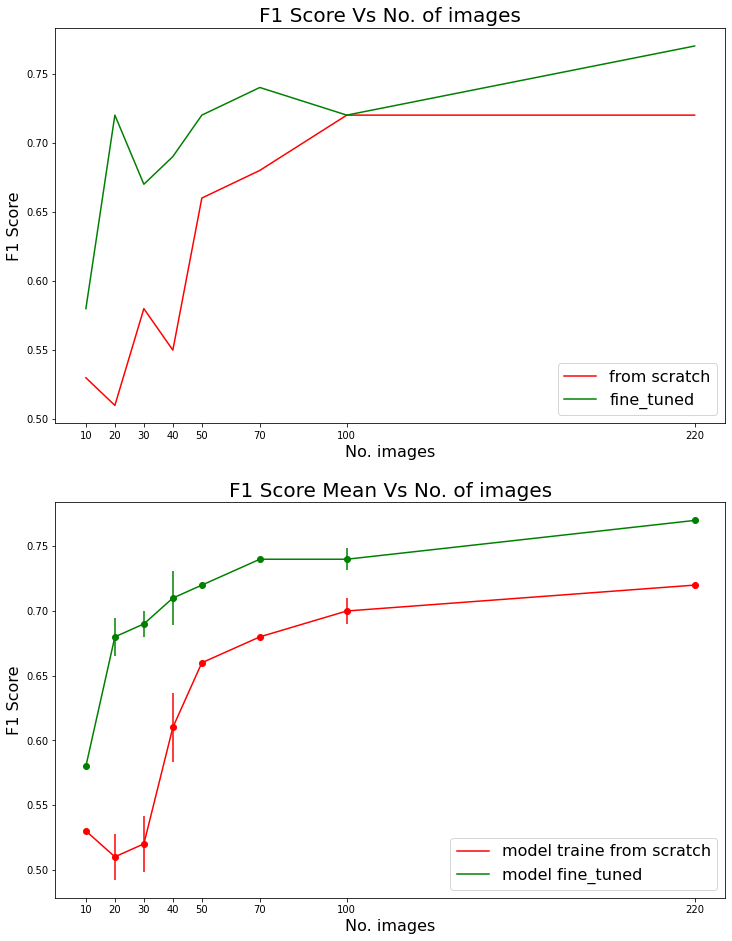

In [4]:
fig, ax = plt.subplots(figsize=(12, 16), nrows=2)
#yerr = np.linspace(0.05, 0.2, 10)
#plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
ax[0].set_title('F1 Score Vs No. of images', fontsize=20)
ax[0].set_xlabel('No. images', fontsize=16)
ax[0].set_ylabel('F1 Score', fontsize=16)

ax[0].plot(fs,green_f1, label='from scratch', color = 'red')
ax[0].plot(fs,green_f1_ft, label='fine_tuned', color = 'green')

ax[0].set_xticks(fs)
#ax.set_xticklabels(labels)
ax[0].legend(loc='lower right', fontsize=16)


ax[1].set_title('F1 Score Mean Vs No. of images', fontsize=20)
ax[1].set_xlabel('No. images', fontsize=16)
ax[1].set_ylabel('F1 Score', fontsize=16)

ax[1].plot(fs,green_f1_mean, label='model traine from scratch', color = 'red')
ax[1].plot(fs,green_f1_ft_mean, label='model fine_tuned', color = 'green')

ax[1].errorbar(fs, green_f1_mean, yerr= green_f1_std_N,
               fmt='o', color = 'red')
ax[1].errorbar(fs, green_f1_ft_mean, yerr= green_f1_ft_std_N,
               fmt='o', color = 'green')


ax[1].set_xticks(fs)
#ax.set_xticklabels(labels)
ax[1].legend(loc='lower right', fontsize=16)


fig.savefig('f1_score_comparison.png')